# Intent Classification

the dataset used in this experment is "MultiWOZ (Multi-domain Wizard-of-Oz) " - https://paperswithcode.com/dataset/multiwoz <br>

about the dataset: the dataset consists of user, bot conversations and their intents. for individual coursework, I decided to perform intent classification, so the user conversations and their intents are extracted to perfrom the task.

## data extraction

the wizard-of-oz dataset comes with train and test folders with 10 JSON files in the train and 2 files in the test folder. the below function is used for extracting the required data from the JSON files.

In [14]:
#this function returns the user data and their intetns, which is used to extraxct train and test data
import json
def data_extraction(address):
    temp_corp = []
    temp_intent = []
    for i in range(1,18):
        if i < 10:
            a = address + 'dialogues_0' +'0'+ str(i) + '.json'
        else:
            a = address + 'dialogues_0' + str(i) + '.json'

        with open(a, 'r') as file:
            data = json.load(file)
            for j in range(len(data)):
                b = data[j]['turns']
                #print(b)
                for k in range(len(b)):
                    if b[k]['speaker'] == 'USER':

                        #print("each frame")
                        #print(b[k])
                        temp_corp.append(b[k]['utterance'])
                        temp = 'NONE'
                        for i in b[k]['frames']:
                            #print("this is i")
                            if i['state']['active_intent'] != 'NONE' and i['state']['slot_values'] != { }:

                                temp = i['state']['active_intent']

                                #print(temp)
                        temp_intent.append(temp)
    return temp_intent, temp_corp

In [15]:
# this is the traing data

train_address = 'c:/Users/surya/Desktop/NLP/courseWork/multiwoz-master/multiwoz-master/data/MultiWOZ_2.2/train/'            

intent, corp = data_extraction(train_address)

# preprocessing
During preprocessing the following set of operations were performed
     <br>contractions - it separates words like I'll - I will, it's - it is.
     <br>lower case - converting all the words into lower case
     <br>tokenization - slpiting the sentences into small tokens
     <br>regular expresions - removing regular expresions from the data
     <br>numeric values - removing numeric values
     <br>stop words - removing stop, which dont carry any real meaning
     <br>lemmatization - removing inflectional ending of the words to return the base word  

In [20]:
# downloding necessary packages for preprocessing 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def data_cleaning(corp):
    
    x_data = []
    temp_list = []
    temp_list2 = []
    temp = ''
    new_corps = []
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    for line in corp:
        temp = contractions.fix(line) # contraction is performed of the text data
        x_data.append(temp)
        temp_list = (tokenizer.tokenize(temp.lower())) # lower case, tokenization and removing regular expression
        temp_list2 = [word for word in temp_list if word.isalpha()] # removing numerical values
        new_corps.extend(temp_list2)

    stop_words = set(stopwords.words('english')) #removing the stop words
    lemmatizer = WordNetLemmatizer() # performing lemmatization
    words = []
    for word in new_corps:
        if word not in stop_words:
            words.append(lemmatizer.lemmatize(word))

    
    return words, x_data
 

In [31]:
words, x_data = data_cleaning(corp) # tokenized words after cleaning the data
unique_words = sorted(set(words))
classes = sorted(set(intent))

In [189]:
corp[:5]

['i need a place to dine in the center thats expensive',
 'Any sort of food would be fine, as long as it is a bit expensive. Could I get the phone number for your recommendation?',
 'Sounds good, could I get that phone number? Also, could you recommend me an expensive hotel?',
 'Yes. Can you book it for me?',
 'i want to book it for 2 people and 2 nights starting from saturday.']

# data visualization



<function matplotlib.pyplot.show(close=None, block=None)>

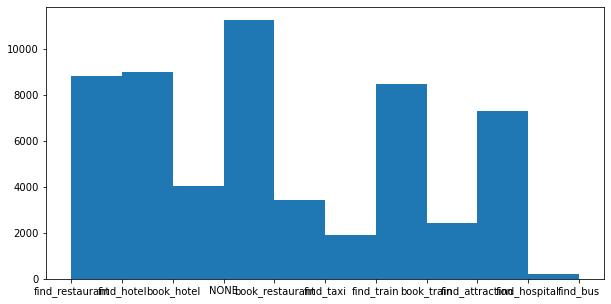

In [151]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(intent) #histogram for the intents
plt.show


USER most used words
 [('need', 12909), ('please', 9983), ('would', 7888), ('thank', 7494), ('yes', 6424), ('looking', 6169), ('like', 6092), ('restaurant', 5432), ('number', 5136), ('also', 5074), ('book', 5029), ('train', 4743), ('help', 4479), ('thanks', 4357), ('cambridge', 4342), ('hotel', 4337), ('people', 3977), ('place', 3861), ('find', 3127), ('free', 3094), ('one', 2971), ('price', 2954), ('get', 2940), ('town', 2900), ('great', 2896), ('address', 2806), ('phone', 2744), ('night', 2661), ('food', 2527), ('centre', 2428), ('could', 2279), ('want', 2272), ('star', 2267), ('postcode', 2212), ('range', 2178), ('area', 2141), ('leave', 2131), ('go', 2104), ('stay', 2097), ('time', 2043), ('parking', 1961), ('much', 1925), ('reference', 1880), ('taxi', 1792), ('expensive', 1765), ('arrive', 1697), ('give', 1611), ('good', 1572), ('guesthouse', 1553), ('today', 1509)]


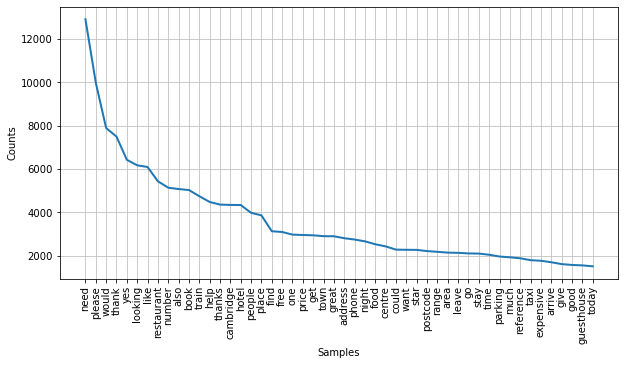

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [146]:
from nltk import FreqDist

fd = FreqDist(w.lower() for w in words) #  top 50 highly used words by the user
print("\nUSER most used words\n", fd.most_common(50))
fd.plot(50)

## Words embedding

In [110]:
from nltk.tokenize import sent_tokenize, word_tokenize

token_list = []
for d in corp:
    s = sent_tokenize(d)
    token_list = token_list + [word_tokenize(d) for d in s]

In [92]:
from gensim.models.word2vec import Word2Vec

emb_model = Word2Vec(token_list, workers=2, vector_size=300, min_count=1, window=3, sample=subsampling)

Wall time: 4.85 s


In [83]:
print(emb_model.wv.most_similar('expensive'))

[('cheap', 0.8421371579170227), ('inexpensive', 0.7393080592155457), ('moderate', 0.7375742197036743), ('Italian', 0.6927595138549805), ('Indian', 0.6775318384170532), ('upscale', 0.6688574552536011), ('actual', 0.6680665612220764), ('indian', 0.6130072474479675), ('eritean', 0.6005113124847412), ('east', 0.5929770469665527)]


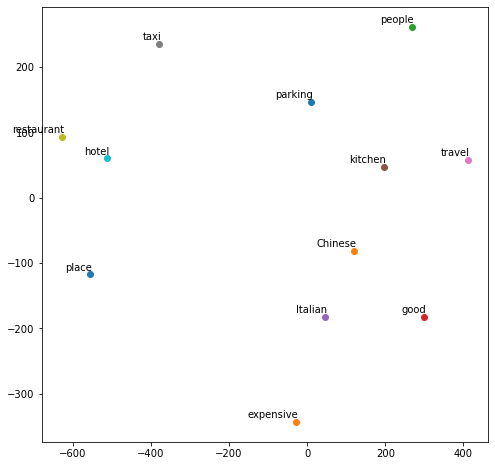

In [155]:
import numpy as np
from sklearn.manifold import TSNE

vocab = ['place','expensive','people', 'good','Italian' ,'kitchen', 'travel','taxi','restaurant', 'hotel', 'parking' ,'Chinese']

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(emb_model)

## bag of words


In [33]:
# here the data is transformed into machine language using bag of words
def bag_of_words(x_data, unique_words, intent, classes):
    training = []
    for i, data in enumerate(x_data):
        ex = []
        text = data.lower()
        for word in unique_words:
            ex.append(1) if word in text else ex.append(0)

        output = [0]*len(classes)   
        output[classes.index(intent[i])] = 1
        training.append([ex, output])
    return training


In [34]:
training = bag_of_words(x_data, unique_words, intent, classes)

In [37]:
import random
import numpy as np

random.shuffle(training) # shuffling the samples
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])

# Model building


In this experiment, a sequential model from Keras was used. A simple neural network was used with the 'relu' and 'softmax' activation functions.
for the optimizer, 'stochastic gradient descent' is used, for loss function, 'categorical cross entropy' is used as it is a multi-class classification model.


In [185]:
from keras.models import Sequential
import pickle
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD



model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))# first layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))# second layer
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))# output layer

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)# Stochastic gradient descent as optimizer
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size = 32, verbose=2)


Epoch 1/200
1775/1775 - 8s - loss: 1.0768 - accuracy: 0.6750 - 8s/epoch - 5ms/step
Epoch 2/200
1775/1775 - 7s - loss: 0.8617 - accuracy: 0.7482 - 7s/epoch - 4ms/step
Epoch 3/200
1775/1775 - 6s - loss: 0.8085 - accuracy: 0.7644 - 6s/epoch - 3ms/step
Epoch 4/200
1775/1775 - 7s - loss: 0.7822 - accuracy: 0.7733 - 7s/epoch - 4ms/step
Epoch 5/200
1775/1775 - 7s - loss: 0.7584 - accuracy: 0.7793 - 7s/epoch - 4ms/step
Epoch 6/200
1775/1775 - 6s - loss: 0.7462 - accuracy: 0.7819 - 6s/epoch - 3ms/step
Epoch 7/200
1775/1775 - 6s - loss: 0.7323 - accuracy: 0.7855 - 6s/epoch - 4ms/step
Epoch 8/200
1775/1775 - 7s - loss: 0.7229 - accuracy: 0.7872 - 7s/epoch - 4ms/step
Epoch 9/200
1775/1775 - 7s - loss: 0.7103 - accuracy: 0.7897 - 7s/epoch - 4ms/step
Epoch 10/200
1775/1775 - 7s - loss: 0.7087 - accuracy: 0.7923 - 7s/epoch - 4ms/step
Epoch 11/200
1775/1775 - 6s - loss: 0.6974 - accuracy: 0.7953 - 6s/epoch - 3ms/step
Epoch 12/200
1775/1775 - 7s - loss: 0.6933 - accuracy: 0.7969 - 7s/epoch - 4ms/step
E

Epoch 99/200
1775/1775 - 7s - loss: 0.5614 - accuracy: 0.8294 - 7s/epoch - 4ms/step
Epoch 100/200
1775/1775 - 7s - loss: 0.5625 - accuracy: 0.8298 - 7s/epoch - 4ms/step
Epoch 101/200
1775/1775 - 7s - loss: 0.5623 - accuracy: 0.8297 - 7s/epoch - 4ms/step
Epoch 102/200
1775/1775 - 7s - loss: 0.5572 - accuracy: 0.8332 - 7s/epoch - 4ms/step
Epoch 103/200
1775/1775 - 7s - loss: 0.5547 - accuracy: 0.8334 - 7s/epoch - 4ms/step
Epoch 104/200
1775/1775 - 7s - loss: 0.5567 - accuracy: 0.8303 - 7s/epoch - 4ms/step
Epoch 105/200
1775/1775 - 6s - loss: 0.5542 - accuracy: 0.8322 - 6s/epoch - 4ms/step
Epoch 106/200
1775/1775 - 6s - loss: 0.5524 - accuracy: 0.8326 - 6s/epoch - 4ms/step
Epoch 107/200
1775/1775 - 6s - loss: 0.5524 - accuracy: 0.8327 - 6s/epoch - 4ms/step
Epoch 108/200
1775/1775 - 6s - loss: 0.5555 - accuracy: 0.8312 - 6s/epoch - 4ms/step
Epoch 109/200
1775/1775 - 7s - loss: 0.5539 - accuracy: 0.8317 - 7s/epoch - 4ms/step
Epoch 110/200
1775/1775 - 7s - loss: 0.5515 - accuracy: 0.8351 - 7

Epoch 196/200
1775/1775 - 7s - loss: 0.5173 - accuracy: 0.8416 - 7s/epoch - 4ms/step
Epoch 197/200
1775/1775 - 6s - loss: 0.5154 - accuracy: 0.8421 - 6s/epoch - 4ms/step
Epoch 198/200
1775/1775 - 7s - loss: 0.5174 - accuracy: 0.8421 - 7s/epoch - 4ms/step
Epoch 199/200
1775/1775 - 7s - loss: 0.5164 - accuracy: 0.8422 - 7s/epoch - 4ms/step
Epoch 200/200
1775/1775 - 7s - loss: 0.5181 - accuracy: 0.8420 - 7s/epoch - 4ms/step


In [39]:
# testing_data
#extracting test data
test_address = 'c:/Users/surya/Desktop/NLP/courseWork/multiwoz-master/multiwoz-master/data/MultiWOZ_2.2/test/'            

test_intent, test_corp = data_extraction(train_address)



In [40]:
# cleaing test data

test_words, x_test = data_cleaning(test_corp)
unique_test_words = sorted(set(test_words))
test_classes = sorted(set(test_intent))


In [45]:
# bag of words on test data
testing = np.array(bag_of_words(x_test, unique_test_words, test_intent, test_classes))
test_x = list(testing[:,0])
test_y = list(testing[:,1])


<ipython-input-45-3d9b50370e70>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testing = np.array(bag_of_words(x_test, unique_test_words, test_intent, test_classes))


## confusion matrix

In [188]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(np.array(test_x))
y_pred = np.argmax(y_pred, axis=1)
test_y1 = np.argmax(test_y, axis=1)
matrix = confusion_matrix(test_y1,y_pred)
print('classification report : \n',classification_report(test_y1, y_pred))
print('Confusion matrix : \n',matrix)


classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     11250
           1       0.90      0.70      0.79      4017
           2       0.74      0.87      0.80      3418
           3       0.88      0.65      0.75      2409
           4       0.88      0.86      0.87      7304
           5       0.00      0.00      0.00         6
           6       0.98      0.50      0.66       214
           7       0.89      0.87      0.88      8978
           8       0.83      0.91      0.87      8798
           9       0.90      0.78      0.84      1923
          10       0.93      0.93      0.93      8459

    accuracy                           0.88     56776
   macro avg       0.80      0.73      0.75     56776
weighted avg       0.88      0.88      0.87     56776

Confusion matrix : 
 [[10922     2    18     2   125     0     2    31   112    16    20]
 [  197  2805   396    61    19     0     0   329   141    42    27]
 [

<AxesSubplot:>

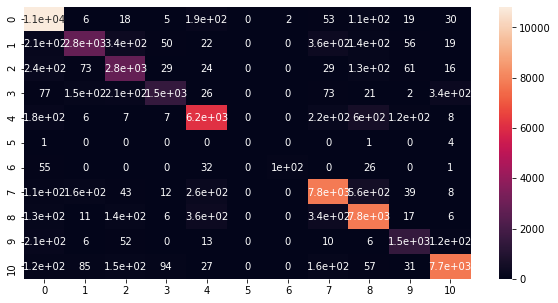

In [176]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

# testing with example

In [182]:
t = str(input()).lower() # takes the input
test_ex = []
for word in unique_words:
    
    test_ex.append(1) if word in t else test_ex.append(0) # perfroming bag of words

res = model.predict(np.array([test_ex]))[0]
ERROR_THRESHOLD = 0.25
results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]

results.sort(key=lambda x: x[1], reverse=True)
return_list = []
for r in results:
    return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
print(return_list)

What is the price and travel time
[{'intent': 'find_train', 'probability': '0.9810954'}]
